# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [3]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [4]:
filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(filename, header=0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [6]:
df.shape

(1562, 19)

In [7]:
#checking for missing values)
nan_count = np.sum(df.isnull())
nan_count

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [8]:
#Checking datatypes
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [9]:
#checking for outliers using zscore
df_zscores = df.select_dtypes(include=['number']).apply(stats.zscore)
df_zscores.head(10)

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,-1.117604,-1.525966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.602902,0.750862,NaN,NaN,NaN
1,-0.825094,-0.920796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.739834,0.034388,NaN,NaN,NaN
2,-0.532585,-0.602588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.329008,0.063311,NaN,NaN,NaN
3,-0.240075,-1.429479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.574717,0.661279,NaN,NaN,NaN
4,0.052434,-1.473008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.540669,0.740499,NaN,NaN,NaN
5,0.344944,-1.661145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.054498,-0.375746,NaN,NaN,NaN
6,0.637453,-2.054847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.602119,0.491014,NaN,NaN,NaN
7,0.929963,-1.294616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.413941,1.304620,NaN,NaN,NaN
8,1.222473,-1.082852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.546106,0.322410,NaN,NaN,NaN
9,1.514982,-2.473509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.447587,1.336588,NaN,NaN,NaN


In [10]:
#now I will create rename the Life Ladder label to label_happy
df.rename(columns = {'Life Ladder': 'label_happy'}, inplace = True)

In [11]:
#check that labels and variables were changed

In [12]:
df.head()

,country,year,label_happy,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [13]:
#determine features with highest and lowest correlation
df.corr()['label_happy']

year                                                       -0.014505
label_happy                                                 1.000000
Log GDP per capita                                          0.779476
Social support                                              0.700299
Healthy life expectancy at birth                            0.729852
Freedom to make life choices                                0.526058
Generosity                                                  0.204910
Perceptions of corruption                                  -0.425013
Positive affect                                             0.554462
Negative affect                                            -0.267492
Confidence in national government                          -0.085543
Democratic Quality                                          0.607034
Delivery Quality                                            0.706673
Standard deviation of ladder by country-year               -0.154257
Standard deviation/Mean of ladder 

In [14]:
#sort features from highest to lowest correlation
corrs = df.corr()['label_happy']

corrs_sorted = corrs.sort_values(ascending = False)
corrs_sorted

label_happy                                                 1.000000
Log GDP per capita                                          0.779476
Healthy life expectancy at birth                            0.729852
Delivery Quality                                            0.706673
Social support                                              0.700299
Democratic Quality                                          0.607034
Positive affect                                             0.554462
Freedom to make life choices                                0.526058
Generosity                                                  0.204910
year                                                       -0.014505
Confidence in national government                          -0.085543
GINI index (World Bank estimate)                           -0.097255
Standard deviation of ladder by country-year               -0.154257
GINI index (World Bank estimate), average 2000-15          -0.172745
Negative affect                   

In [15]:
#fill in missing values with mean value
mean_log_GDP = df['Log GDP per capita'].mean()
mean_social_support = df['Social support'].mean()
mean_birth_life_expect = df['Healthy life expectancy at birth'].mean()
mean_freedom = df['Freedom to make life choices'].mean()
mean_perception_corruption = df['Perceptions of corruption'].mean()
mean_positive_affect = df['Positive affect'].mean()
mean_negative_affect = df['Negative affect'].mean()
mean_democ_qual = df['Democratic Quality'].mean()
mean_deliv_quality = df['Delivery Quality'].mean()
df['Log GDP per capita'].fillna(value = mean_log_GDP, inplace=True)
df['Social support'].fillna(value = mean_social_support, inplace=True)
df['Healthy life expectancy at birth'].fillna(value = mean_birth_life_expect, inplace = True)
df['Freedom to make life choices'].fillna(value = mean_freedom, inplace = True)
df['Perceptions of corruption'].fillna(value = mean_perception_corruption, inplace = True)
df['Positive affect'].fillna(value = mean_positive_affect, inplace = True)
df['Negative affect'].fillna(value = mean_negative_affect, inplace = True)
df['Democratic Quality'].fillna(value = mean_democ_qual, inplace = True)
df['Delivery Quality'].fillna(value = mean_deliv_quality, inplace = True)

In [16]:
#Check that the missing values were replaced
nan_count = np.sum(df.isnull())
nan_count

country                                                       0
year                                                          0
label_happy                                                   0
Log GDP per capita                                            0
Social support                                                0
Healthy life expectancy at birth                              0
Freedom to make life choices                                  0
Generosity                                                   80
Perceptions of corruption                                     0
Positive affect                                               0
Negative affect                                               0
Confidence in national government                           161
Democratic Quality                                            0
Delivery Quality                                              0
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [17]:
#delete features with too many missing values and poor correlation or if the feature is not important to the prediction
drop_columns = ['country', 'Generosity', 'year', 'Confidence in national government', 'GINI index (World Bank estimate)', 'Standard deviation of ladder by country-year', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year', 'Standard deviation/Mean of ladder by country-year']

# Check if the columns exist before dropping
columns_to_drop = [col for col in drop_columns if col in df.columns]

df.drop(columns=columns_to_drop, inplace=True)
df.head(15)


,label_happy,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Democratic Quality,Delivery Quality
0,3.723590,7.168690,0.450662,49.209663,0.718114,0.881686,0.517637,0.258195,-1.929690,-1.655084
1,4.401778,7.333790,0.552308,49.624432,0.678896,0.850035,0.583926,0.237092,-2.044093,-1.635025
2,4.758381,7.386629,0.539075,50.008961,0.600127,0.706766,0.618265,0.275324,-1.991810,-1.617176
3,3.831719,7.415019,0.521104,50.367298,0.495901,0.731109,0.611387,0.267175,-1.919018,-1.616221
4,3.782938,7.517126,0.520637,50.709263,0.530935,0.775620,0.710385,0.267919,-1.842996,-1.404078
5,3.572100,7.503376,0.483552,51.042980,0.577955,0.823204,0.620585,0.273328,-1.879709,-1.403036
6,3.130896,7.484583,0.525568,51.370525,0.508514,0.871242,0.531691,0.374861,-1.773257,-1.312503
7,3.982855,7.466215,0.528597,51.693527,0.388928,0.880638,0.553553,0.339276,-1.844364,-1.291594
8,4.220169,7.461401,0.559072,52.016529,0.522566,0.793246,0.564953,0.348332,-1.917693,-1.432548
9,2.661718,7.460144,0.490880,52.339527,0.427011,0.954393,0.496349,0.371326,-0.126617,0.004947


In [18]:
#check the shape
df.shape

(1562, 10)

In [19]:
#I am categorizing the label into True or False
# happiness score over or equal to 5 is True and score below 5 is False
df['label_happy'] = pd.to_numeric(df['label_happy'], errors='coerce')
df['label_happy'] = df['label_happy'] >= 5.0
df.head(30)

,label_happy,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Democratic Quality,Delivery Quality
0,False,7.168690,0.450662,49.209663,0.718114,0.881686,0.517637,0.258195,-1.929690,-1.655084
1,False,7.333790,0.552308,49.624432,0.678896,0.850035,0.583926,0.237092,-2.044093,-1.635025
2,False,7.386629,0.539075,50.008961,0.600127,0.706766,0.618265,0.275324,-1.991810,-1.617176
3,False,7.415019,0.521104,50.367298,0.495901,0.731109,0.611387,0.267175,-1.919018,-1.616221
4,False,7.517126,0.520637,50.709263,0.530935,0.775620,0.710385,0.267919,-1.842996,-1.404078
5,False,7.503376,0.483552,51.042980,0.577955,0.823204,0.620585,0.273328,-1.879709,-1.403036
6,False,7.484583,0.525568,51.370525,0.508514,0.871242,0.531691,0.374861,-1.773257,-1.312503
7,False,7.466215,0.528597,51.693527,0.388928,0.880638,0.553553,0.339276,-1.844364,-1.291594
8,False,7.461401,0.559072,52.016529,0.522566,0.793246,0.564953,0.348332,-1.917693,-1.432548
9,False,7.460144,0.490880,52.339527,0.427011,0.954393,0.496349,0.371326,-0.126617,0.004947


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [20]:
#I am predicting whther people are happy or not and if they're score is over 5, they are happy (True) 
# and under 5 is unhappy(false)
y = df['label_happy']
X = df.drop(columns = 'label_happy', axis = 0)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [22]:
#Determine best hyperparamters for radnom forest by first making some test values
param_rf_grid = {
    'n_estimators': [300, 400, 500],    # Number of trees in the forest
    'max_depth': [None, 15, 25],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 6],    # Minimum number of samples 
    'min_samples_leaf': [1, 2, 6]       # Minimum number of samples 
}


In [23]:
#create model_rf for best hyperparamters and perform gridsearchcv
model_rf = RandomForestClassifier(random_state=42)
grid_rf_search = GridSearchCV(estimator=model_rf, param_grid=param_rf_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

In [24]:
#fit the model to the grid search to find best params
grid_rf_search.fit(X_train, y_train)
grid_rf_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   53.1s finished


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [25]:
#Create the actual RandomForestClassifier model object using best found hyperparamters
model = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)

#Fit the model 
model.fit(X_train, y_train)

#Call predict() to use the fitted model to make predictions on the test data.
rf_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
confusion = confusion_matrix(y_test, rf_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion)

Accuracy: 0.8997867803837953
Confusion Matrix:
 [[157  21]
 [ 26 265]]


In [26]:
#Now I will test a GBDT against the Random Forest to see which one performs better for my model
#First check for best hyperparamters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [27]:
gbc = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy')

In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [29]:
grid_search.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [30]:
#Create the  GradientBoostingClassifier model
gbdt_model = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 5, min_samples_leaf = 2, min_samples_split = 10, n_estimators = 100)
#Fit the model 
gbdt_model.fit(X_train, y_train)

# Call predict() 
y_gbdt_pred = gbdt_model.predict(X_test)

accuracy_gbdt = accuracy_score(y_test, y_gbdt_pred)
confusion_gbdt = confusion_matrix(y_test, y_gbdt_pred)

print('Accuracy:', accuracy_gbdt)
print('Confusion Matrix:\n', confusion_gbdt)


Accuracy: 0.8869936034115139
Confusion Matrix:
 [[155  23]
 [ 30 261]]


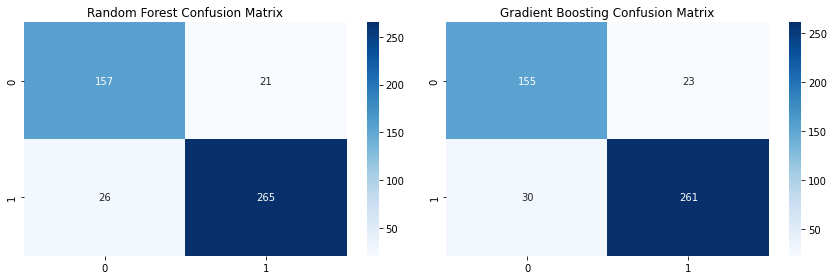

In [31]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_gbdt, annot=True, cmap='Blues', fmt='d')
plt.title('Gradient Boosting Confusion Matrix')

plt.tight_layout()
plt.show()


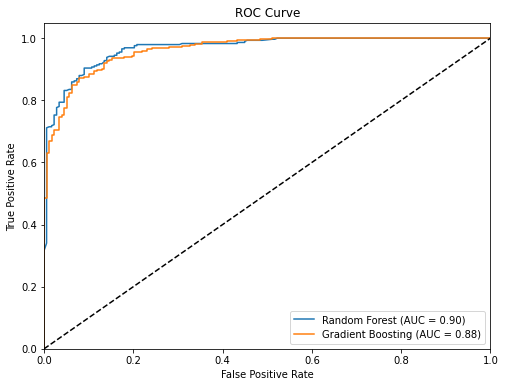

In [32]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gbdt_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf_pred)))
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_score(y_test, y_gbdt_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [1]:
#I think moving forward with the model, I will be using the Random Forest model based on it's ability to predict

In [33]:
#For the github portion of the lab, my github username is marinawild